In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans 
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
data = pd.read_csv('CC GENERAL.csv')

1. Preprocessing

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
mean_credit_limit = data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'].fillna(mean_credit_limit, inplace=True)

In [7]:
mean_min_payments = data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'].fillna(mean_min_payments, inplace=True)

In [8]:
data = data.drop("CUST_ID", axis=1)

In [9]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

2. Hierarchical clustering

- Scaling and Normalization

In [10]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)
data_normalized = normalize(data_scaled) 
data_normalized = pd.DataFrame(data_normalized) 
data_normalized.columns = data.columns
data_normalized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


- Agglomerative Clustering

In [11]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clusters = model.fit_predict(data_normalized)   
data_normalized['CLUSTER'] = pd.DataFrame(clusters)
data_normalized['CLUSTER'].value_counts()

0    4811
1    2397
2     873
3     869
Name: CLUSTER, dtype: int64

- Clusters' plots

Text(0.5, 1.0, 'Clustering of Balance vs Payments (normalized data)')

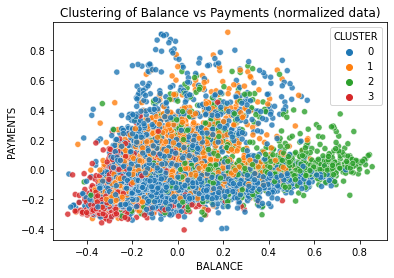

In [12]:
sns.scatterplot(data=data_normalized, x='BALANCE', y='PAYMENTS', hue='CLUSTER', palette="tab10", alpha=0.8)
plt.title("Clustering of Balance vs Payments (normalized data)")

Text(0.5, 1.0, 'Clustering of Balance vs Purchases (normalized data)')

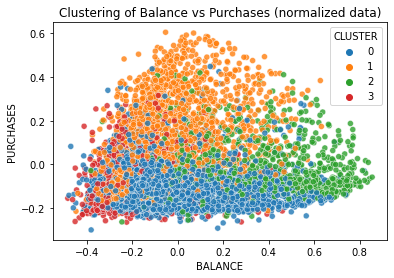

In [13]:
sns.scatterplot(data=data_normalized, x='BALANCE', y='PURCHASES', hue='CLUSTER', palette="tab10", alpha=0.8)
plt.title("Clustering of Balance vs Purchases (normalized data)")

3. Dendogram

Text(0, 0.5, 'Euclidean distances')

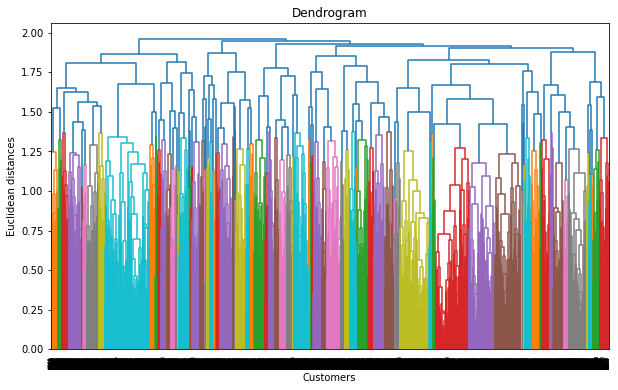

In [14]:
plt.figure(figsize=(10,6))
dendogram =shc.dendrogram(shc.linkage(data_normalized.iloc[:, :-1], method="complete"))
plt.title("Dendrogram")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

4. Kmeans

- Elbow method

In [15]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_normalized.iloc[:, :-1])
    sum_of_squared_distances.append(km.inertia_)

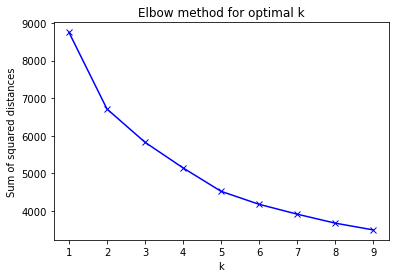

In [16]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

- Model with K=3

In [17]:
model = KMeans(n_clusters=3, random_state=42)  
kmeans = model.fit(data_normalized.iloc[:, :-1])
kmeans.predict(data_normalized.iloc[:, :-1])

array([1, 2, 0, ..., 0, 1, 0])

In [18]:
klabels_3 = pd.DataFrame(kmeans.labels_)
data_normalized['LABELS_K3'] = klabels_3

Text(0.5, 1.0, 'Kmean clusters : Balance vs Purchases')

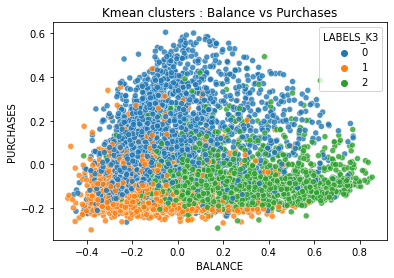

In [19]:
sns.scatterplot(data=data_normalized, x='BALANCE', y='PURCHASES', hue='LABELS_K3', palette="tab10", alpha=0.8)
plt.title("Kmean clusters : Balance vs Purchases")

- Model with K=4

In [24]:
model = KMeans(n_clusters=4, random_state=42)  
kmeans = model.fit(data_normalized.iloc[:, :-2])
kmeans.predict(data_normalized.iloc[:, :-2])

array([2, 1, 0, ..., 3, 2, 0])

In [25]:
klabels_4 = pd.DataFrame(kmeans.labels_)
data_normalized['LABELS_K4'] = klabels_4

Text(0.5, 1.0, 'Kmean clusters : Balance vs Purchases')

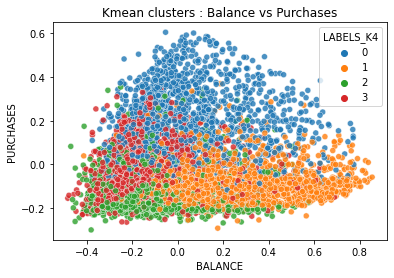

In [26]:
sns.scatterplot(data=data_normalized, x='BALANCE', y='PURCHASES', hue='LABELS_K4', palette="tab10", alpha=0.8)
plt.title("Kmean clusters : Balance vs Purchases")

<u>Possible classification</u>

- label 0 : Moderate balance and high purchases 
- label 1 : Moderate to high balance and low purchases 
- label 2 : Low balance and low purchases 
- label 3 : Low balance and moderate purchases 

5. Comparison Agglomerative / Kmeans clusterings

Text(0.5, 1.0, 'Balance vs Purchases : K_MEAN clustering')

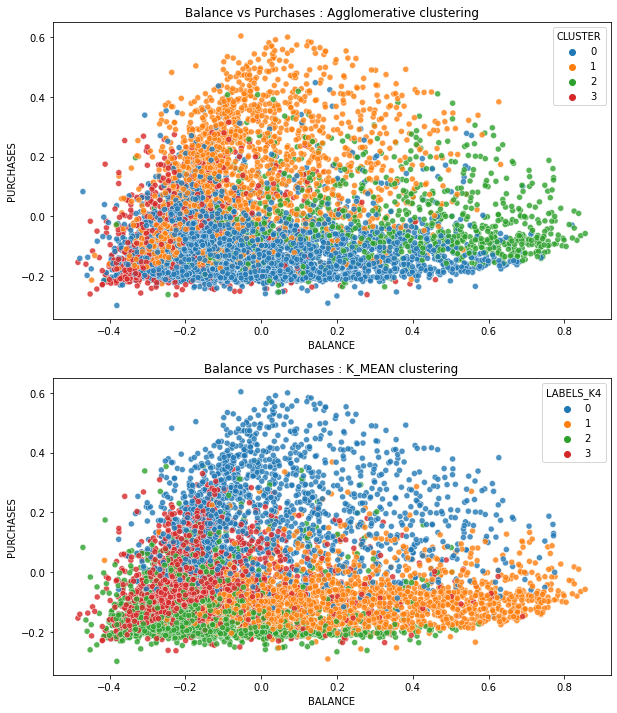

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 12))

ax1 = plt.subplot(2, 1, 1)
sns.scatterplot(data=data_normalized, x='BALANCE', y='PURCHASES', hue='CLUSTER', palette="tab10", alpha=0.8)
ax1.set_title('Balance vs Purchases : Agglomerative clustering')

ax2 = plt.subplot(2, 1, 2)
sns.scatterplot(data=data_normalized, x='BALANCE', y='PURCHASES', hue='LABELS_K4', palette="tab10", alpha=0.8)
ax2.set_title('Balance vs Purchases : K_MEAN clustering')

6. Another validation metric : silhouette score

In [29]:
for k in range(2,11):
    km = KMeans(n_clusters = k)
    preds = km.fit_predict(data_normalized.iloc[:, 0:17])
    centers = km.cluster_centers_

    score = silhouette_score(data_normalized, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.2484842803073413
For n_clusters = 3, silhouette score is 0.23642036073982106
For n_clusters = 4, silhouette score is 0.3818210137776387
For n_clusters = 5, silhouette score is 0.28697883017134296
For n_clusters = 6, silhouette score is 0.2747563694430386
For n_clusters = 7, silhouette score is 0.23837299393046688
For n_clusters = 8, silhouette score is 0.1739346779172353
For n_clusters = 9, silhouette score is 0.15806838335524315
For n_clusters = 10, silhouette score is 0.12092517923924448
